# Boston House Price Prediction

In [17]:
# import required library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import datasets

## Reading Dataset

In [4]:
# load dataset from sklearn 
boston_dataset = datasets.load_boston()
# load datset as pandas datsframe 
data = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
data['target'] = boston_dataset.target
# print 10 sample rows
data.sample(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4
206,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
347,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36,23.1
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15,29.6
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1
201,0.03445,82.5,2.03,0.0,0.415,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43,24.1


Dataset contains 13 features and 1 target variable(continous). 

In [5]:
# describing the feature name and attribute information
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Thoughts...
1. No missing value are given
2. As target value is represnted as median , there are chances that dataset contain outliers.
3. Most of the feature correlates the target value.
4. Feature have different scales.

# Data Exploration

In [6]:
# checking for any missing value
print("Missing values for every features.")
data.isna().sum()

Missing values for every features.


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

As given there are no missing values

In [7]:
# check datatype and na values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


All data is in numeric(float64)

In [8]:
#describe dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
# check if rows are duplicte or not
print(f"There are {data.duplicated().sum()} rows in dataset.")

There are 0 rows in dataset.


## Thoughts...
1. Dataset dosent contain any null values.
2. All features and target vatriable are numeric(float64), `CHAS` is an categorical varible.
3. Features `CHAS`, `NOX` and `ZN` have more than 50% value as zero.
4. Most of the feature contain outliers that need to fixed.
5. There are no duplicated rows



### Feature Engineering

In [12]:
def distribution_plot(data):
    columns = data.columns
    fig, ax = plt.subplots(14,2,figsize=(16,64) )
    for ii, col_name in enumerate(columns):
        sns.violinplot(data[col_name], ax=ax[ii][0], orient='v')
        ax[ii][0].set_title(f"{col_name} Violin Plot",)
        sns.distplot(data[col_name], ax=ax[ii][1], kde=False)
        ax[ii][1].set_title(f"{col_name} Distribution Plot",)

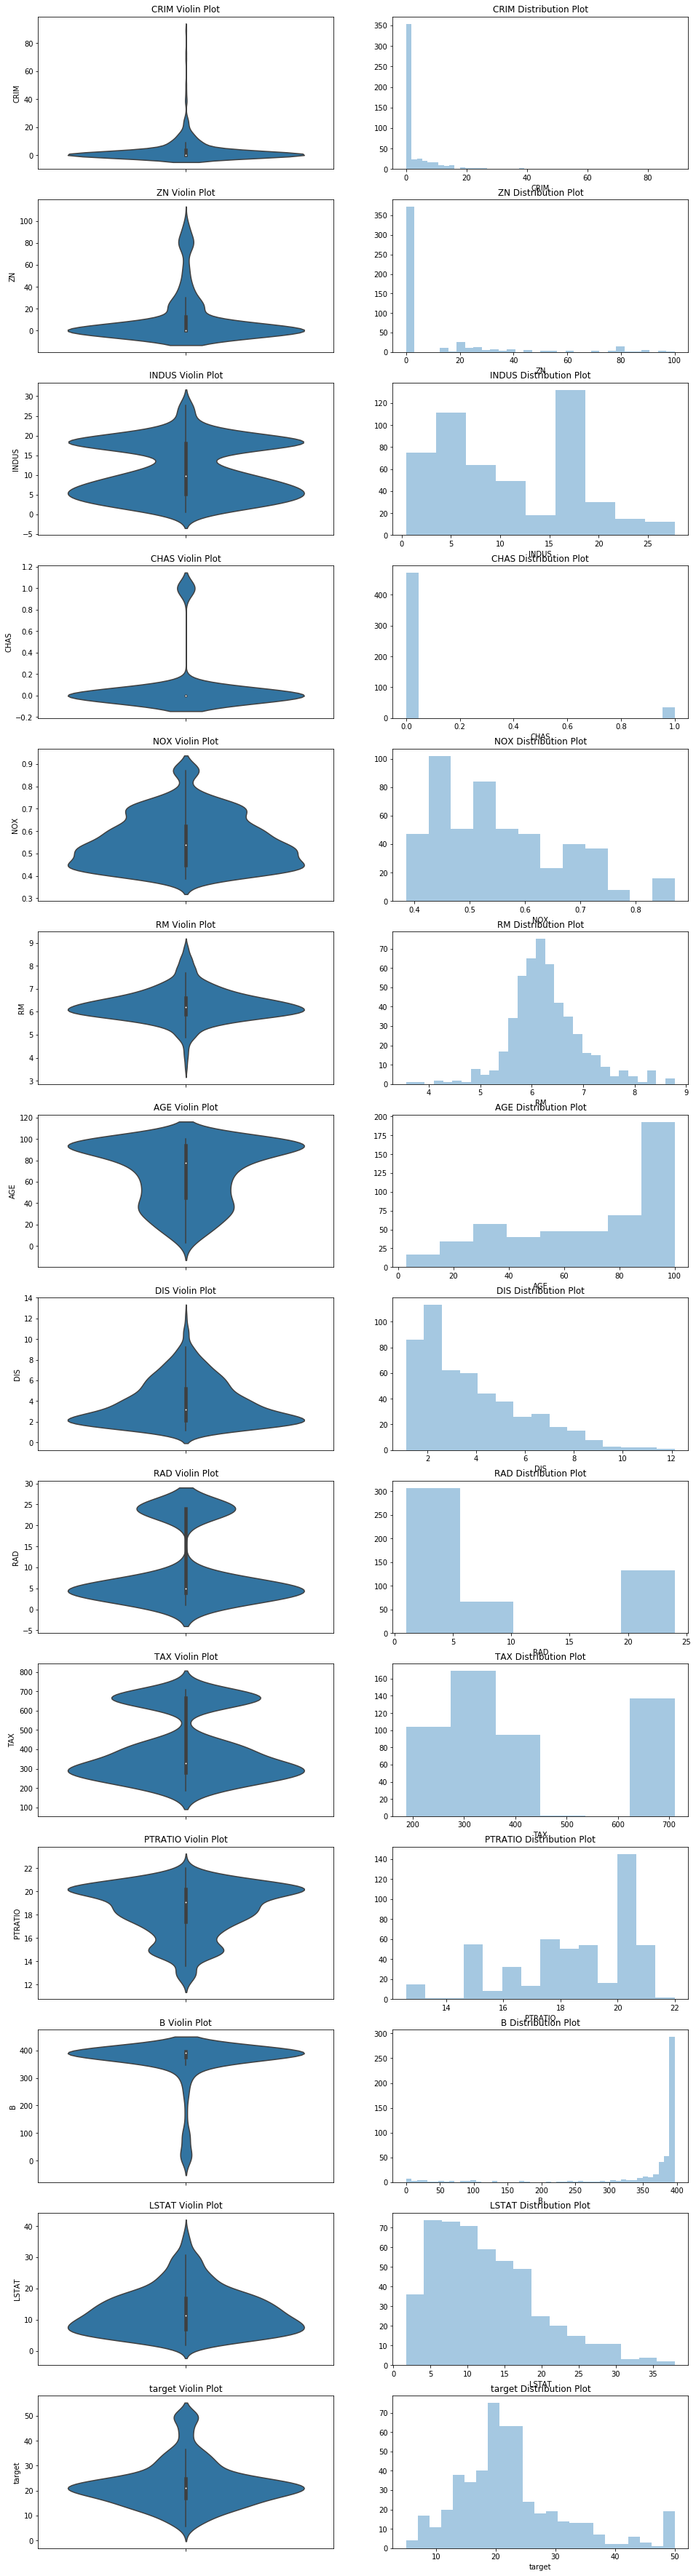

In [13]:
distribution_plot(data)

* `CRIM`, `ZN` and features are `left skewed`.
* `B` is `right skewed`.
* `target` is normally distributed.
* `CRIM`, `ZN` ,`CHAS`, `RN` ,`B` and `Target` seems to have outlier.

In [18]:
# removing Outliers
data = data[(np.abs(stats.zscore(data))<3).all(axis=1)]

In [19]:
#checking stats
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.0,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.0,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.0,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.0,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.0,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.0,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.0,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


* `CHAS` feture is only containing '0'. 

In [20]:
#droping CHAS feature as it only contains 0
data.drop('CHAS',axis=1, inplace=True)

In [21]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2.452461,9.602410,10.829687,0.547168,6.267554,67.384337,3.852640,8.684337,393.853012,18.467952,374.235373,12.275976,22.353976
std,4.897241,19.677404,6.798613,0.110428,0.611602,28.072043,1.964763,8.196802,161.196133,2.137611,51.582784,6.474602,8.077366
min,0.006320,0.000000,0.460000,0.385000,4.368000,2.900000,1.169100,1.000000,188.000000,12.600000,83.450000,1.730000,5.600000
25%,0.081005,0.000000,5.130000,0.449000,5.886000,43.550000,2.203200,4.000000,279.000000,17.400000,377.880000,7.210000,17.550000
50%,0.211610,0.000000,8.560000,0.524000,6.193000,73.900000,3.377900,5.000000,315.000000,19.000000,392.630000,11.220000,21.200000
75%,2.152115,12.500000,18.100000,0.609000,6.559500,93.700000,5.287300,8.000000,437.000000,20.200000,396.900000,16.215000,24.800000
max,28.655800,80.000000,27.740000,0.871000,8.337000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,31.990000,50.000000


[]

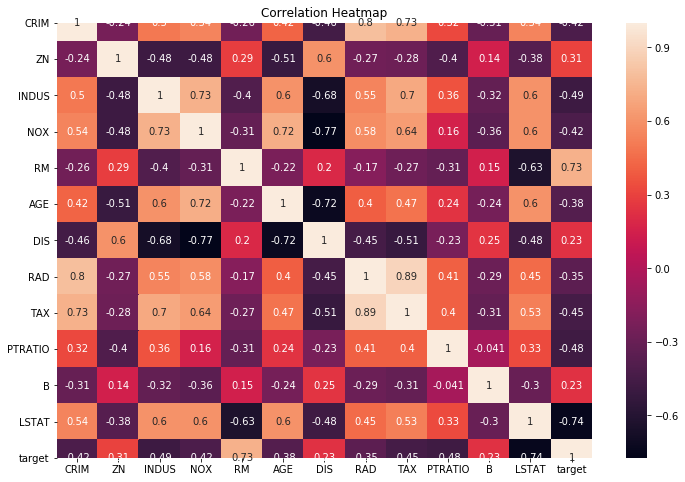

In [22]:
# analyzing how features correlates with one and orther
corr_matrix = data.corr()
# plot heatmap
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation Heatmap")
plt.plot()

* features like `LSTAT`, `PTRATIO`, `TAX`, `INDUS` and `RM` highly correlates with target variable. (IMP features).
* feature `TAX` and `RAD` have strong correlation index. 
* feature `DIS` and `NOX` have strong correlation index. 
* feature `CHAS` dosen't contribute much to prediction. Need to verify.

In [24]:
#removing RAD and DIS features
data = data.drop(['RAD','DIS'], axis=1) # correlated features with least contribution

[]

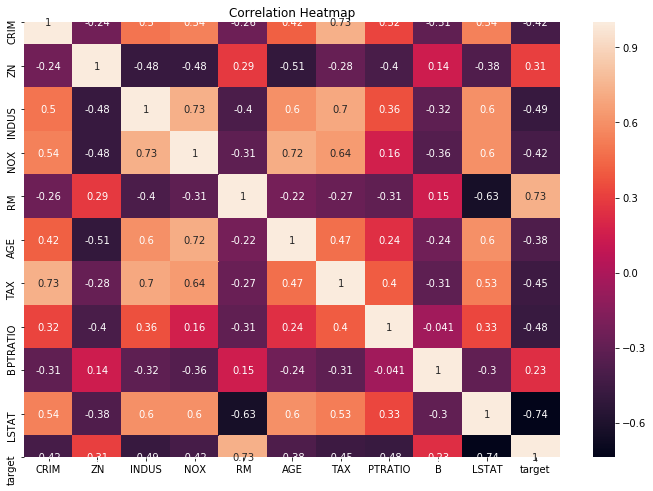

In [25]:
# analyzing how features correlates with one and orther
corr_matrix = data.corr()
# plot correation heatmap
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation Heatmap")
plt.plot()

* Features like `INDUS`, `RM`, `TAX`, `PTRATIO` and `LSTAT` have high correlation(>.45) with target variable.

In [26]:
# Removing feature eith correlation less tha 0.40 with target feature
features_to_remove = ['ZN', 'AGE', 'B']
data.drop(features_to_remove, axis=1, inplace=True)

In [27]:
# Removing skewness
for feature_name in data.columns[:-1]:
    data[feature_name] = data[feature_name] if -0.3 < data[feature_name].skew() < 0.3 else data[feature_name].apply(np.log1p)


#### How high correlated feature contribute to target variable

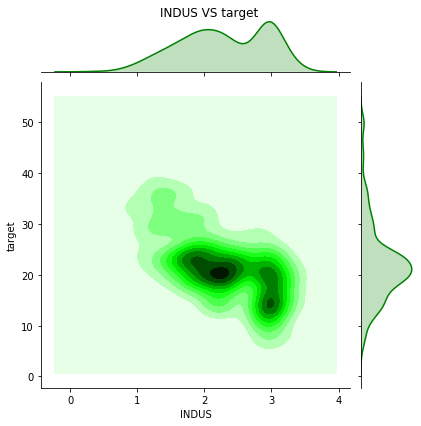

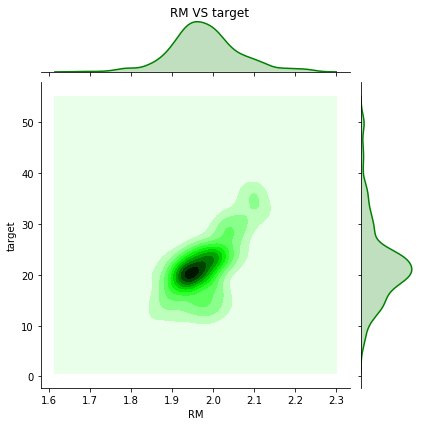

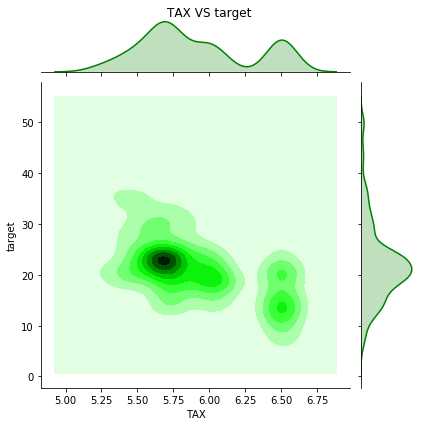

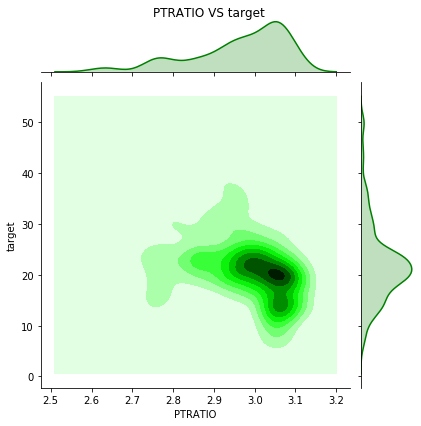

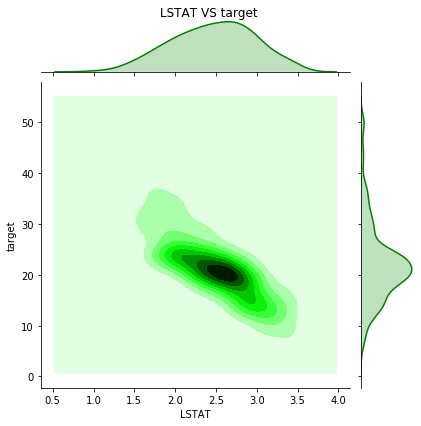

In [28]:

imp_features = ['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
for ii, feature in enumerate(imp_features):
    
    ax = sns.jointplot(feature, 'target', data=data,
              kind="kde", color="g");
    ax.fig.suptitle(f"{feature} VS target")
    ax.fig.subplots_adjust(top=0.95)


In [29]:
# reset index of dataframe
data = data.reset_index(drop=True)